## Вступление

**Описание задачи**:

Этот проект посвящен исследованию влияния других переменных, таких как пол, этническая принадлежность, уровень образования родителей, обед и курсы подготовки к тестированию, на успеваемость учащихся (результаты тестов).

Ссылка на kaggle: https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance/data

## Данные и переменные

Набор данных содержит оценки, полученные учащимися по различным предметам.

* gender - пол школьников -> (мужской/женский)

* race/ethnicity - этническая принадлежность школьников -> (группа A, B,C, D,E)

* parental level of education - последнее образование родителей -> (степень бакалавра, какой-то колледж, степень магистра, степень младшего специалиста, - средняя школа)

* lunch - обед перед тестированием (стандартный или бесплатный/льготный)

* test preparation course - курсы по подготовке к тестированию перед тестированием (завершены/не завершены)

* math score - оценка по математике
* reading score - оценка по чтению
* writing score - оценка по письму

In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [191]:
data = pd.read_csv('/content/study_performance.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [192]:
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


## Анализ данных

In [193]:
data.shape

(1000, 9)

In [194]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
dtype: int64

In [195]:
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
dtype: int64

In [196]:
data.duplicated().sum()

0

In [197]:
data.describe(percentiles=[0.025, 0.05, 0.25, 0.5, 0.75, 0.95, 0.975])

,math_score,reading_score,writing_score,total_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
2.5%,35.00000,39.000000,38.000000,117.000000
5%,40.95000,44.000000,42.950000,133.950000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
95%,90.05000,92.000000,92.000000,270.050000


In [198]:
data.nunique()

gender                           2
race_ethnicity                   5
parental_level_of_education      6
lunch                            2
test_preparation_course          2
math_score                      81
reading_score                   72
writing_score                   77
total_score                    194
dtype: int64

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
 8   total_score                  1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


Посмотрим на категориальные колонки.

In [200]:
gender_group = data.groupby('gender', as_index=False) \
    .gender.value_counts()
gender_group

,gender,count
0,female,518
1,male,482


In [201]:
lunch_group = data.groupby('lunch', as_index=False) \
    .lunch.value_counts()
lunch_group

,lunch,count
0,free/reduced,355
1,standard,645


In [202]:
test_preparation_group = data.groupby('test_preparation_course', as_index=False) \
    .test_preparation_course.value_counts()
test_preparation_group

,test_preparation_course,count
0,completed,358
1,none,642


In [203]:
race_ethnicity_group = data.groupby('race_ethnicity', as_index=False) \
    .race_ethnicity.value_counts()
race_ethnicity_group

,race_ethnicity,count
0,group A,89
1,group B,190
2,group C,319
3,group D,262
4,group E,140


In [204]:
parent_group = data.groupby('parental_level_of_education', as_index=False) \
    .parental_level_of_education.value_counts()
parent_group

,parental_level_of_education,count
0,associate's degree,222
1,bachelor's degree,118
2,high school,196
3,master's degree,59
4,some college,226
5,some high school,179


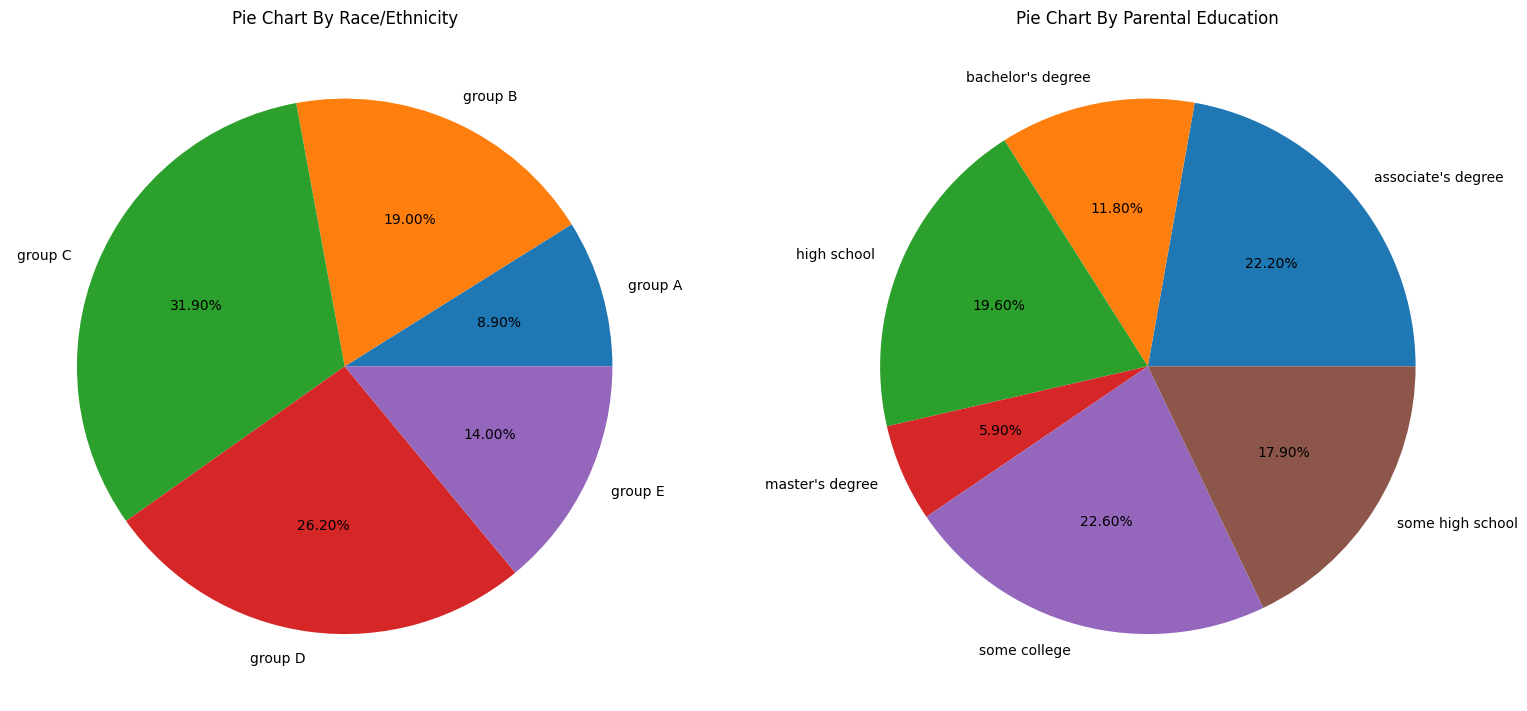

In [205]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 9))

ax1.pie(x=race_ethnicity_group['count'], labels=race_ethnicity_group.race_ethnicity, autopct='%.2f%%')
ax1.set_title('Pie Chart By Race/Ethnicity', size=12)

ax2.pie(x=parent_group['count'], labels=parent_group.parental_level_of_education, autopct='%.2f%%')
ax2.set_title('Pie Chart By Parental Education', size=12)

plt.show()

Посмотрим на количественные колонки.

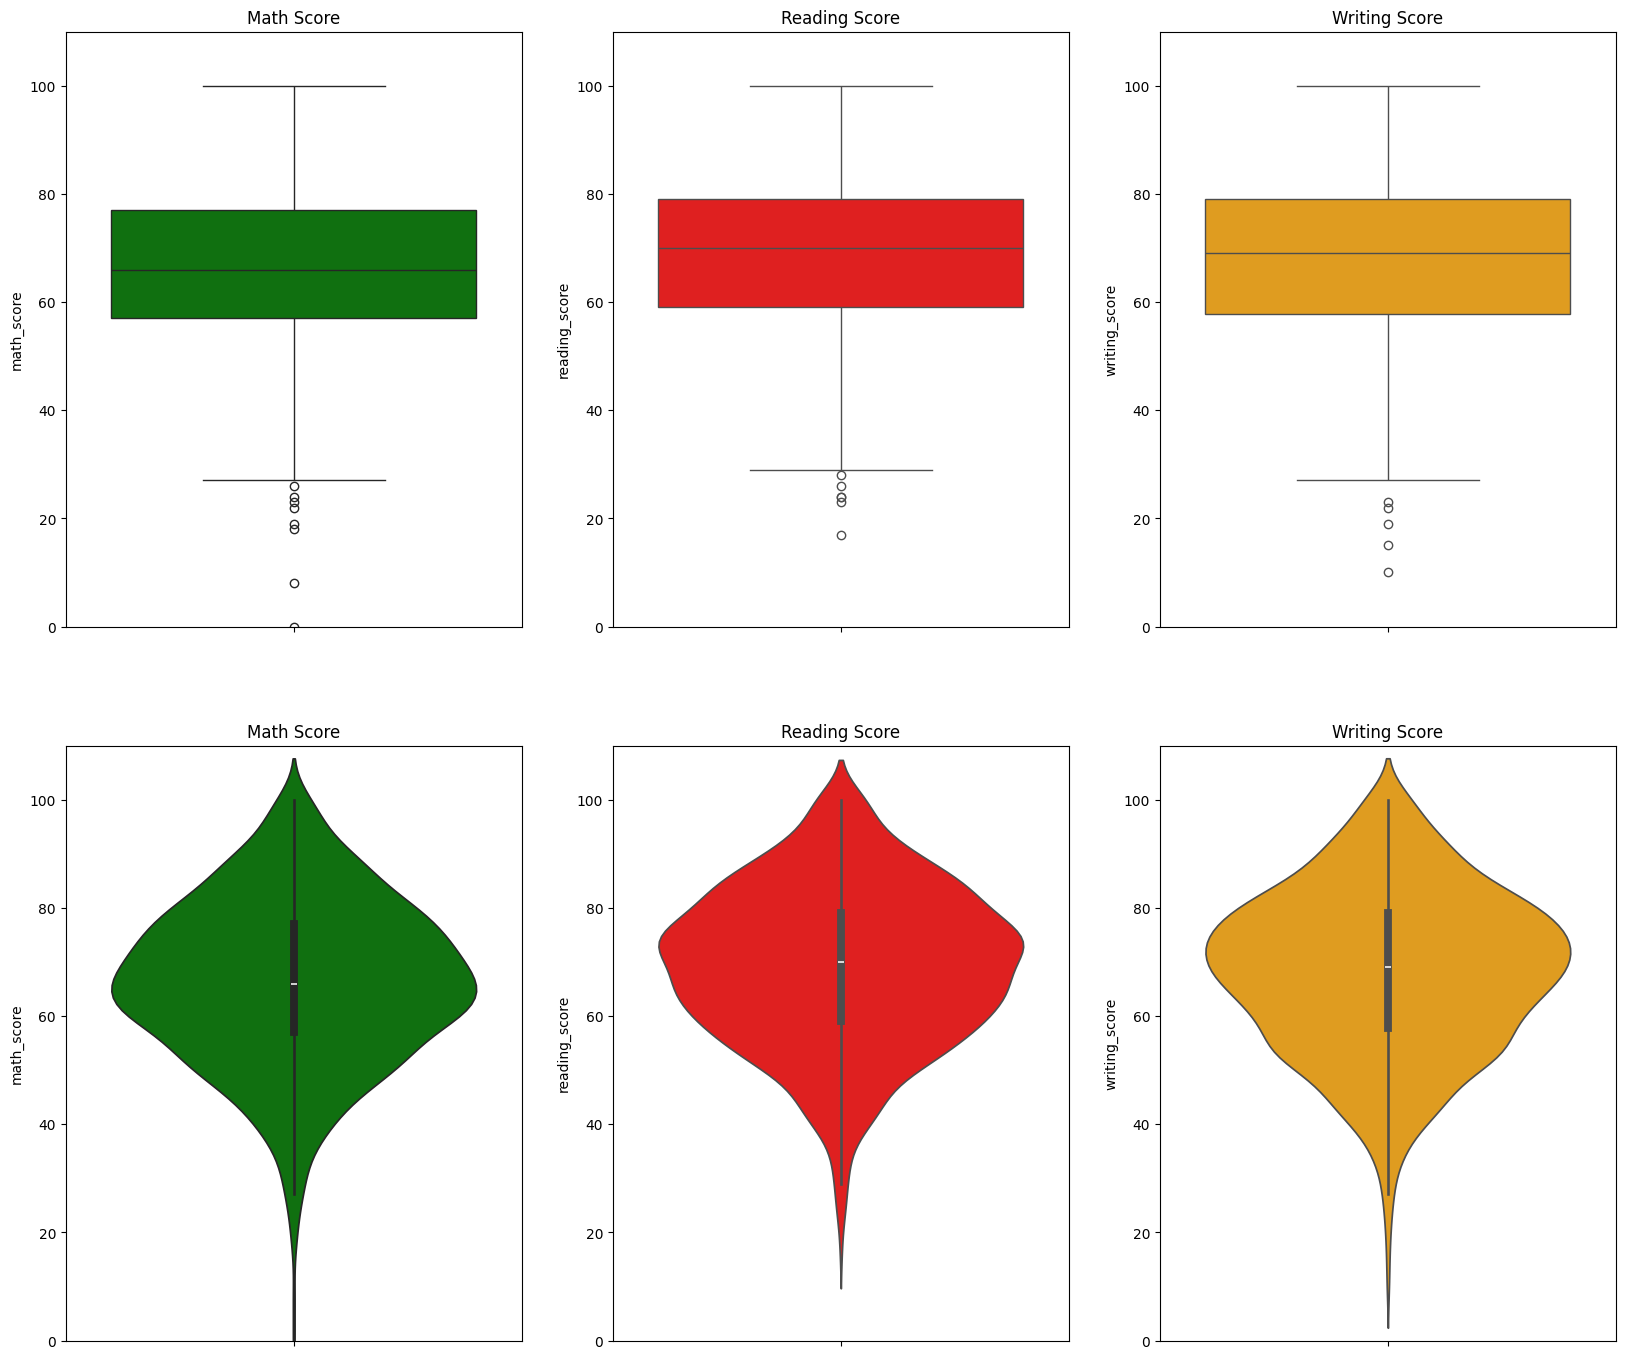

In [206]:
fig, axes = plt.subplots(2, 3, figsize=(20, 17), sharex=True, sharey=False)

sns.boxplot(data=data, y='math_score', color='green', ax=axes[0][0])
axes[0][0].set_title('Math Score')
axes[0][0].set_ylim(0, 110)

sns.boxplot(data=data, y='reading_score', color='red', ax=axes[0][1])
axes[0][1].set_title('Reading Score')
axes[0][1].set_ylim(0, 110)

sns.boxplot(data=data, y='writing_score', color='orange', ax=axes[0][2])
axes[0][2].set_title('Writing Score')
axes[0][2].set_ylim(0, 110)

sns.violinplot(data=data, y='math_score', color='green', ax=axes[1][0])
axes[1][0].set_title('Math Score')
axes[1][0].set_ylim(0, 110)

sns.violinplot(data=data, y='reading_score', color='red', ax=axes[1][1])
axes[1][1].set_title('Reading Score')
axes[1][1].set_ylim(0, 110)

sns.violinplot(data=data, y='writing_score', color='orange', ax=axes[1][2])
axes[1][2].set_title('Writing Score')
axes[1][2].set_ylim(0, 110)

plt.show()

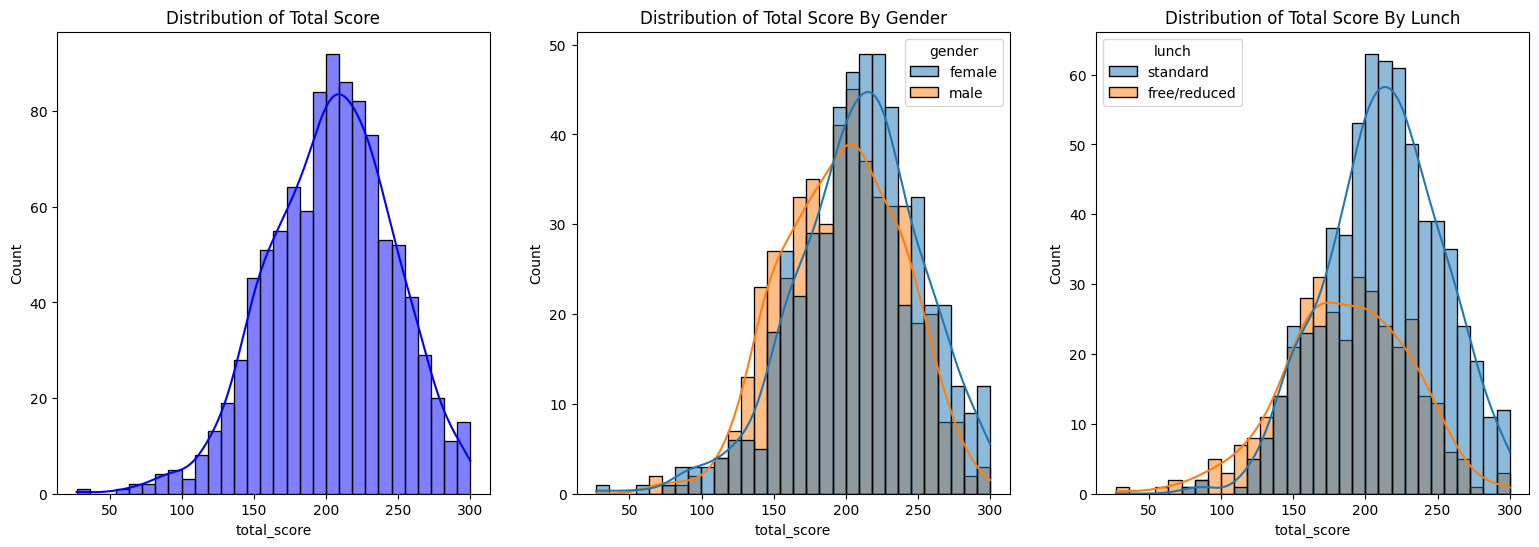

In [207]:
fig, axes = plt.subplots(1, 3, figsize=(19, 6))

sns.histplot(data=data, x='total_score', bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribution of Total Score', size=12)

sns.histplot(data=data, x='total_score', bins=30, kde=True, hue='gender', ax=axes[1])
axes[1].set_title('Distribution of Total Score By Gender', size=12)

sns.histplot(data=data, x='total_score', bins=30, kde=True, hue='lunch', ax=axes[2])
axes[2].set_title('Distribution of Total Score By Lunch', size=12)

plt.show()

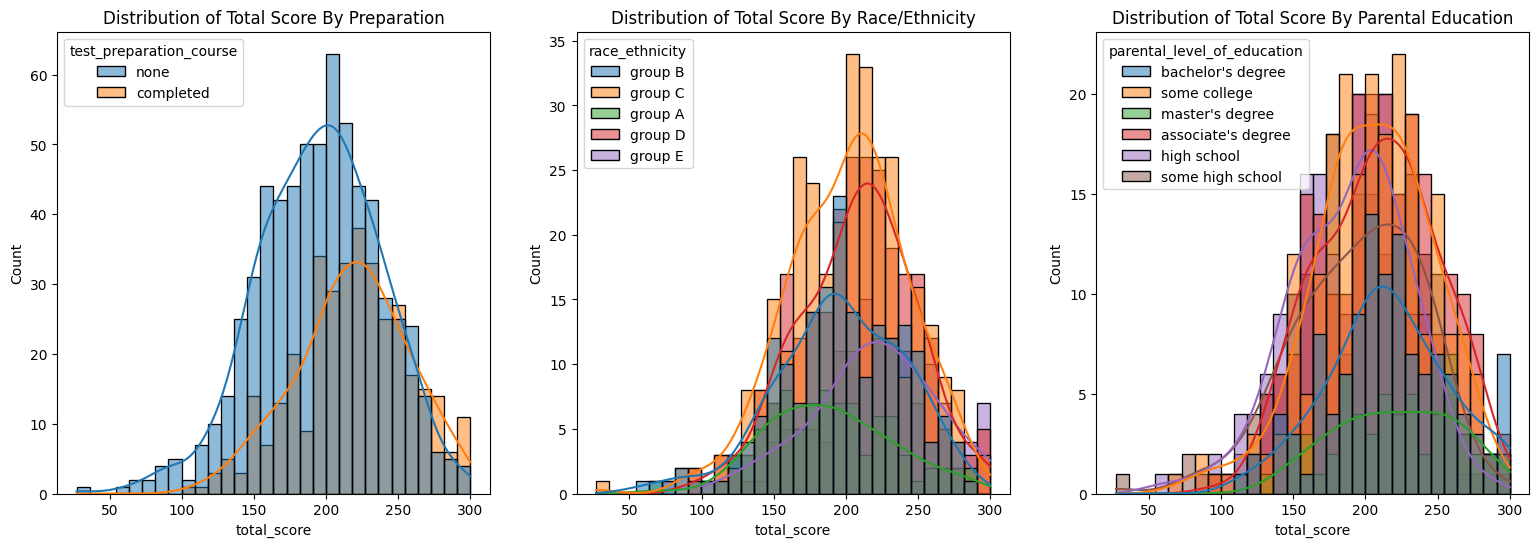

In [208]:
fig, axes = plt.subplots(1, 3, figsize=(19, 6))

sns.histplot(data=data, x='total_score', bins=30, kde=True, hue='test_preparation_course', ax=axes[0])
axes[0].set_title('Distribution of Total Score By Preparation', size=12)

sns.histplot(data=data, x='total_score', bins=30, kde=True, hue='race_ethnicity', ax=axes[1])
axes[1].set_title('Distribution of Total Score By Race/Ethnicity', size=12)

sns.histplot(data=data, x='total_score', bins=30, kde=True, hue='parental_level_of_education', ax=axes[2])
axes[2].set_title('Distribution of Total Score By Parental Education', size=12)

plt.show()

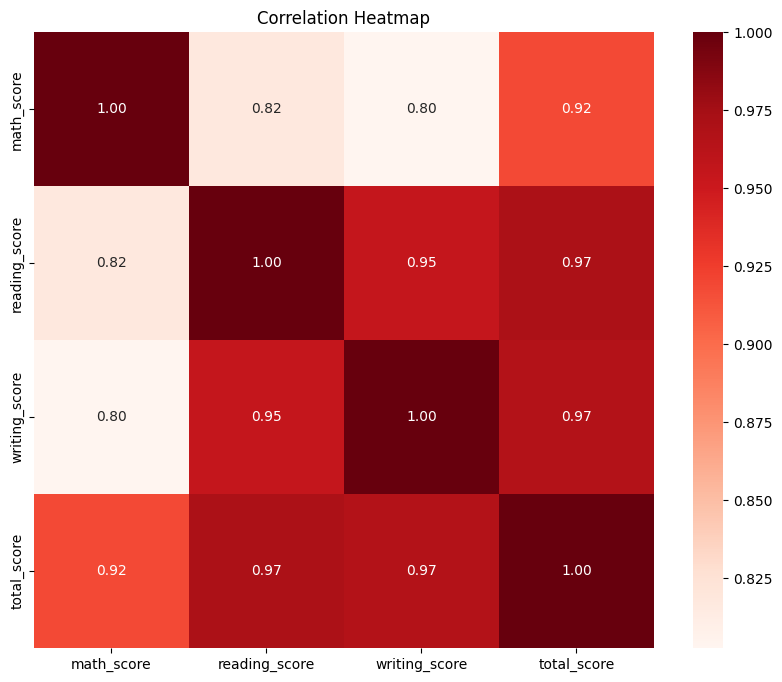

In [209]:
numeric_data = data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Видно, что оценки за 3 экзамена очень сильно попарно коррелируют.

## Обучение модели

Будем предсказывать суммарное количество баллов только по категориальным признакам.

In [210]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [211]:
X = data.drop(columns=['math_score',
                       'reading_score',
                       'writing_score',
                       'total_score'], axis=1)
y = data['total_score']

numeric_features = X.select_dtypes(exclude='object').columns
categorical_features = X.select_dtypes(include='object').columns

In [212]:
data_transformer = ColumnTransformer([
    ('StandardScaler', StandardScaler(), numeric_features),
    ('OneHotEncoder', OneHotEncoder(), categorical_features)
])

X = data_transformer.fit_transform(X)

In [213]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8
)

In [214]:
def fit_model(model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)

    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    R2 = r2_score(y_test, prediction)

    print("Mean Absolute Error: {:.4f}".format(MAE))
    print("Mean Squared Error: {:.4f}".format(MSE))
    print("R2 Score: {:.4f}\n".format(R2))

    a, b = np.polyfit(y_test, prediction, 1)

    plt.figure(figsize=(6, 6))
    plt.plot(y_test, a * y_test + b, color='red')
    plt.scatter(y_test, prediction, color='black')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

    return model, prediction

### Linear Regression

Mean Absolute Error: 30.3904
Mean Squared Error: 1405.9124
R2 Score: 0.1298



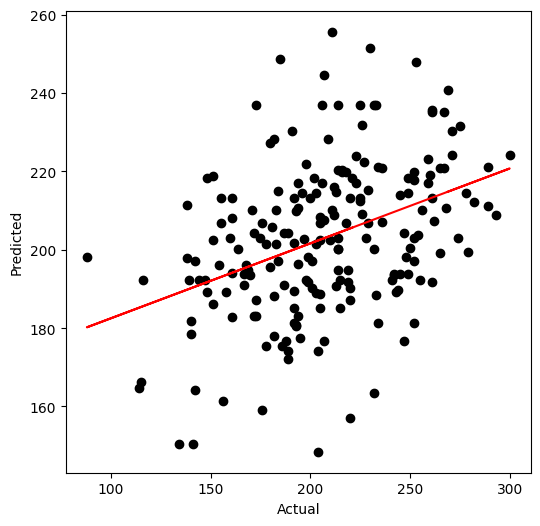

In [215]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg, prediction = fit_model(linear_reg)

### Ridge Regression

In [216]:
param_grid = {'alpha': [i for i in range(1, 21)]}
ridge_model = Ridge()

ridge_search = GridSearchCV(estimator=ridge_model,
                            param_grid=param_grid, cv=5,
                            scoring='neg_mean_squared_error')
ridge_search.fit(X_train, y_train)

print('Лучшие параметры:', ridge_search.best_params_)

Лучшие параметры: {'alpha': 12}


Mean Absolute Error: 30.2633
Mean Squared Error: 1397.6003
R2 Score: 0.1349



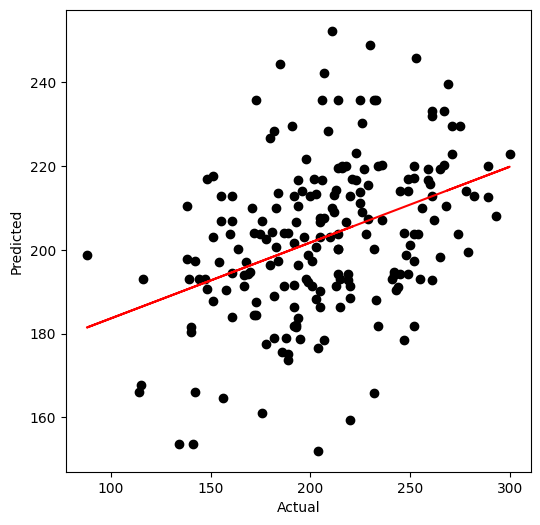

In [217]:
ridge = Ridge(alpha=14)
ridge, prediction = fit_model(ridge)

### Lasso Regression

In [218]:
param_grid = {'alpha': [i / 1000 for i in range(1, 1000, 100)]}
lasso_model = Lasso(alpha=1)

lasso_search = GridSearchCV(estimator=lasso_model,
                            param_grid=param_grid, cv=10,
                            scoring='neg_mean_squared_error')
lasso_search.fit(X_train, y_train)

print('Лучшие параметры:', lasso_search.best_params_)

Лучшие параметры: {'alpha': 0.001}


Mean Absolute Error: 30.3895
Mean Squared Error: 1405.8723
R2 Score: 0.1298



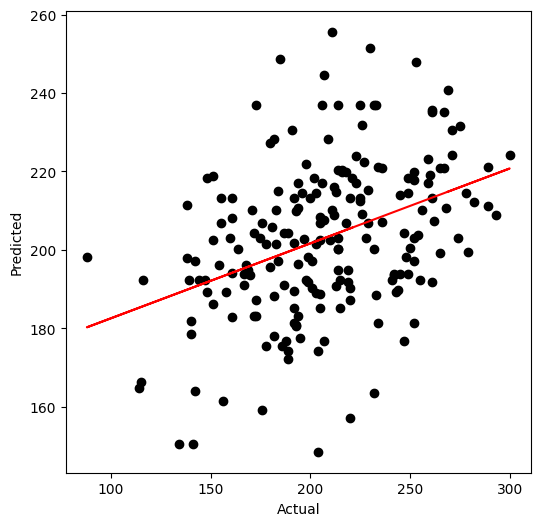

In [219]:
lasso = Lasso(alpha=0.001)
lasso, prediction = fit_model(lasso)

Как-то не очень. Понятно, что если добавить баллы за письменный экзамен и чтение, то действительные значения и предсказания выстроятся по прямой в силу сильной корреляции этих признаков

Теперь предскажем, к примеру, баллы за математику, если присутствуют ещё и баллы за чтение и письменный экзамен.

In [220]:
X = data.drop(columns=['math_score',
                       'total_score'], axis=1)
y = data['math_score']

numeric_features = X.select_dtypes(exclude='object').columns
categorical_features = X.select_dtypes(include='object').columns

data_transformer = ColumnTransformer([
    ('StandardScaler', StandardScaler(), numeric_features),
    ('OneHotEncoder', OneHotEncoder(), categorical_features)
])

X = data_transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8
)

Mean Absolute Error: 4.0782
Mean Squared Error: 25.9043
R2 Score: 0.8902



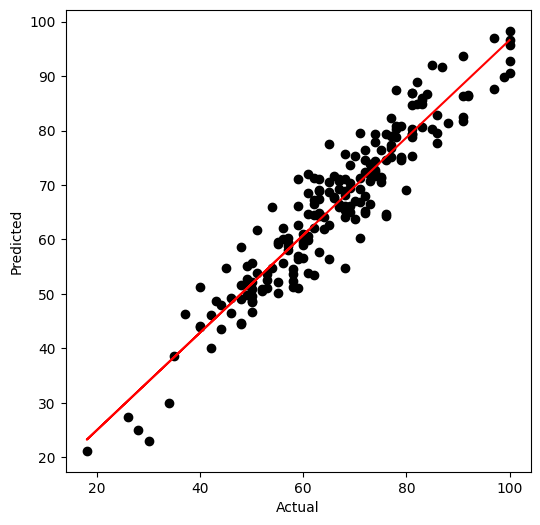

In [221]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg, prediction = fit_model(linear_reg)

In [222]:
param_grid = {'alpha': [i for i in range(1, 21)]}
ridge_model = Ridge()

ridge_search = GridSearchCV(estimator=ridge_model,
                            param_grid=param_grid, cv=5,
                            scoring='neg_mean_squared_error')
ridge_search.fit(X, y)

print('Лучшие параметры:', ridge_search.best_params_)

Лучшие параметры: {'alpha': 2}


Mean Absolute Error: 4.0699
Mean Squared Error: 25.8532
R2 Score: 0.8904



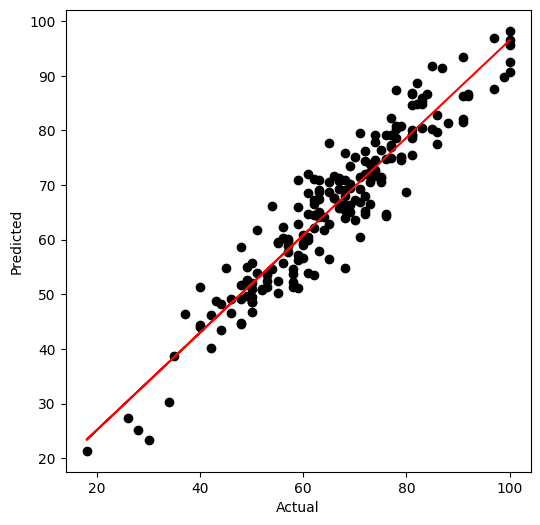

In [223]:
ridge = Ridge(alpha=2)
ridge, prediction = fit_model(ridge)

In [224]:
param_grid = {'alpha': [i / 1000 for i in range(1, 1001, 100)]}
lasso_model = Lasso(alpha=1)

lasso_search = GridSearchCV(estimator=lasso_model,
                            param_grid=param_grid, cv=10,
                            scoring='neg_mean_squared_error')
lasso_search.fit(X_train, y_train)

print('Лучшие параметры:', lasso_search.best_params_)

Лучшие параметры: {'alpha': 0.101}


Mean Absolute Error: 4.0785
Mean Squared Error: 25.9146
R2 Score: 0.8901



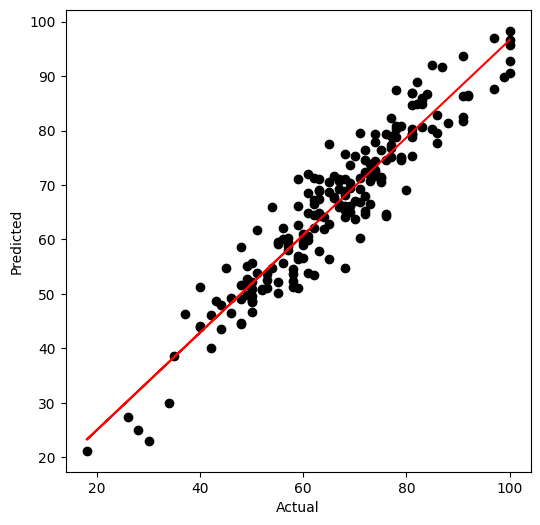

In [225]:
lasso = Lasso(alpha=0.001)
lasso, prediction = fit_model(lasso)

Видно, что с учётом количественных признаков данные выстраиваются по прямой, то есть сильная зависимость между количественными признаками (баллами за экзамены).

## Вывод

* После применения линейной регрессии и её L2, L1 оптимизаций не было обнаружено какой-либо заметной зависимости между оценками за экзамены и категориальными признаками.

* Была обнаружена сильная скоррелированность оценок за каждый из экзаменов по отдельности. То есть существует тенденция, что если студент написал один или два экзамена хорошо, то и оставшиеся он тоже напишет хорошо, и наоборот. Это же подтверждается линейной регрессией и её L2, L1 оптимизациями.